# Histograms

#### Importing Modules

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
from helper import read_8bit_img_from_raw_data, write_8bit_img_to_raw_data, normalize, print_info_2d, print_info_1d
NUM_OF_BITS = 256
MAX_PIXEL_VAL = 255

#### Main Methods

Here is the implementation for the main methods used

In [15]:
def get_histogram(img, normalize=True):
    h, w = img.shape
    freq = np.zeros(NUM_OF_BITS, dtype=np.int32)
    for i in range(h):
        for j in range(w):
            freq[img[i][j]] += 1
    return freq/(h*w)

def get_cdf(hist, normalize=True):
    cdf = np.zeros_like(hist)
    for i in range(len(hist)):
        cdf[i] = hist[:i].sum()
    return cdf/cdf[-1]

def apply_cdf_to_image(img, cdf):
    modified_image = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            modified_image[i][j] = cdf[input[i][j]]
    return modified_image

def equalize_image(img, upper_bound=255):
    hist = get_histogram(img)
    cdf = get_cdf(hist)
    return apply_cdf_to_image(img, cdf*upper_bound)
    

### Histogram Equalization

Image was written to lena_histequal.raw


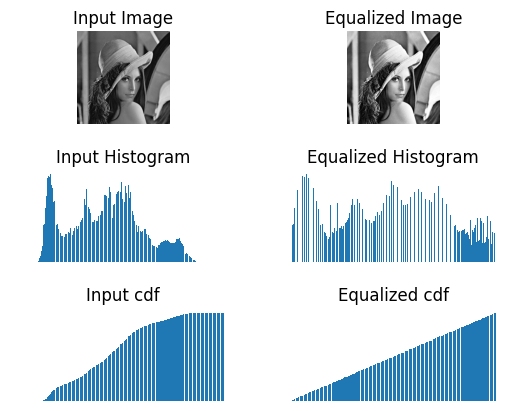

In [16]:
input = read_8bit_img_from_raw_data("data/lena.raw", 512, 512)
equalized = equalize_image(input)
input_histogram = get_histogram(input)
equalized_histogram = get_histogram(equalized)
input_cdf = get_cdf(input_histogram)
equalized_cdf = get_cdf(equalized_histogram)
figure, axes = plt.subplots(3,2)
plt.subplots_adjust(hspace=0.5)
axes[0,0].set_title('Input Image')
axes[0,1].set_title('Equalized Image')
axes[0,0].imshow(im.fromarray(input), cmap='gray')
axes[0,1].imshow(im.fromarray(equalized), cmap='gray')
axes[1,0].set_title('Input Histogram')
axes[1,0].bar(range(NUM_OF_BITS), input_histogram)
axes[1,1].set_title('Equalized Histogram')
axes[1,1].bar(range(NUM_OF_BITS), equalized_histogram)
axes[2,0].set_title('Input cdf')
axes[2,0].bar(range(NUM_OF_BITS), input_cdf)
axes[2,1].set_title('Equalized cdf')
axes[2,1].bar(range(NUM_OF_BITS), equalized_cdf)
for row in axes:
    for ax in row:
        ax.set_autoscale_on(True)
        ax.set_axis_off()
write_8bit_img_to_raw_data(equalized, filename='lena_histequal.raw')


### Histogram Specification

Image was written to lena_histspec.raw


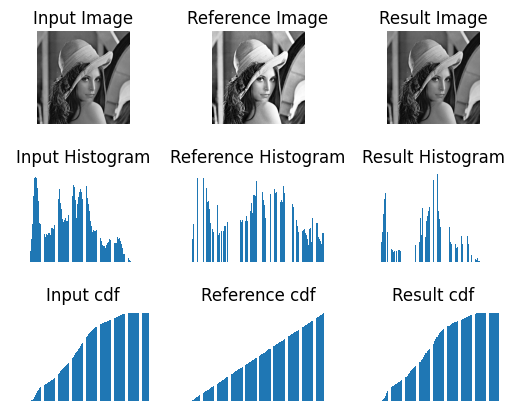

In [17]:
ref_img = read_8bit_img_from_raw_data('lena_histequal.raw', 512, 512)
ref_hist = get_histogram(ref_img)
ref_cdf = get_cdf(ref_hist)
specified = apply_cdf_to_image(input, ref_cdf*MAX_PIXEL_VAL)
specified_hist = get_histogram(specified)
specified_cdf = get_cdf(specified_hist)
figure, axes = plt.subplots(3,3)
plt.subplots_adjust(hspace=0.5)
axes[0,0].set_title('Input Image')
axes[0,1].set_title('Reference Image')
axes[0,2].set_title('Result Image')
axes[0,0].imshow(im.fromarray(input), cmap='gray')
axes[0,1].imshow(im.fromarray(ref_img), cmap='gray')
axes[0,2].imshow(im.fromarray(specified), cmap='gray')
axes[1,0].set_title('Input Histogram')
axes[1,1].set_title('Reference Histogram')
axes[1,2].set_title('Result Histogram')
axes[1,0].bar(range(NUM_OF_BITS), input_histogram)
axes[1,1].bar(range(NUM_OF_BITS), ref_hist)
axes[1,2].bar(range(NUM_OF_BITS), specified_hist)
axes[2,0].set_title('Input cdf')
axes[2,1].set_title('Reference cdf')
axes[2,2].set_title('Result cdf')
axes[2,0].bar(range(NUM_OF_BITS), input_cdf)
axes[2,1].bar(range(NUM_OF_BITS), ref_cdf)
axes[2,2].bar(range(NUM_OF_BITS), specified_cdf)
for row in axes:
    for ax in row:
        ax.set_autoscale_on(True)
        ax.set_axis_off()
write_8bit_img_to_raw_data(equalized, filename='lena_histspec.raw')
